In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

This tutorial contains the basics of plotting in Python / Jupyter.
We will mostly relying on Matplotlib and Seaborn, make sure to have those installed !

# Hello world

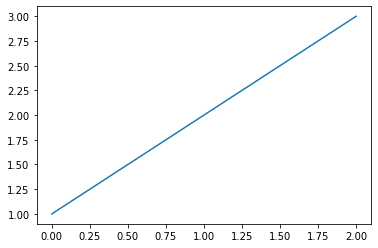

In [16]:
x = [1,2,3]
plt.plot(x)

#### What is the problem ?
There are no labels

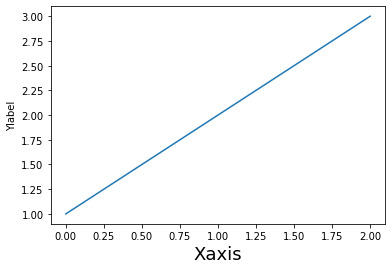

In [19]:
plt.xlabel('Xaxis', fontsize=18)
plt.ylabel('Ylabel')
plt.plot(x)

# Line plot

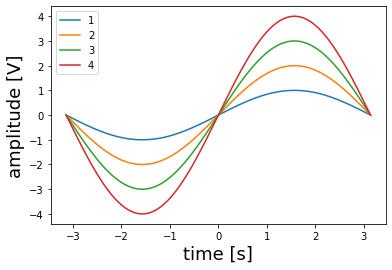

In [21]:
for i in range(1,5):
    x = np.linspace(-np.pi, np.pi, 201)
    plt.plot(x, np.sin(x)*i, label=i)
    
plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend()

#### What is the problem ?
Legent

# Error bars

In [22]:
# Data
var1 = np.random.normal(10,1,10000)
var2 = np.random.normal(10,10,10000)
var3 = np.random.normal(10,100,10000)

# Calculate the average
var1_mean = np.mean(var1)
var2_mean = np.mean(var2)
var3_mean = np.mean(var3)

# Calculate the standard deviation
var1_std = np.std(var1)
var2_std = np.std(var2)
var3_std = np.std(var3)

# Define labels, positions, bar heights and error bar heights
labels = ['var1', 'var2', 'var3']
x_pos  = np.arange(len(labels))
CTEs   = [var1_mean, var2_mean, var3_mean]
error  = [var1_std*2, var2_std*2, var3_std*2]

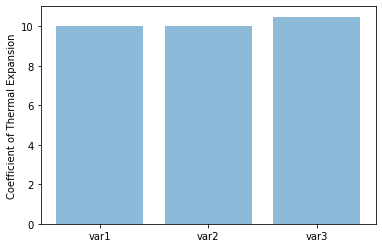

In [23]:
plt.bar(x_pos, CTEs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, 
       tick_label=labels)

plt.ylabel('Coefficient of Thermal Expansion')
_ = plt.xticks(x_pos)

#### What is the problem ?
Error bars !

(array([  25.,  186.,  996., 2257., 3034., 2308.,  951.,  218.,   21.,
           4.]),
 array([ 6.46272821,  7.24726674,  8.03180526,  8.81634379,  9.60088232,
        10.38542084, 11.16995937, 11.95449789, 12.73903642, 13.52357495,
        14.30811347]),
 <a list of 10 Patch objects>)

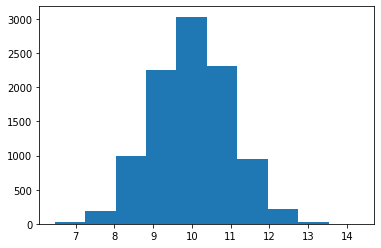

In [25]:
plt.hist(var1)

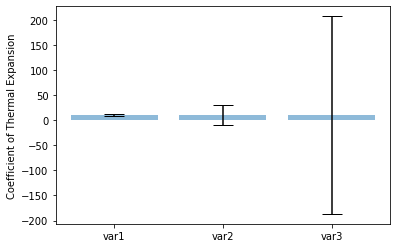

In [29]:
errors = [1.96*var1_std, 1.96*var2_std, 1.96*var3_std,]

plt.bar(x_pos, CTEs, yerr = errors,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, 
       tick_label=labels)

plt.ylabel('Coefficient of Thermal Expansion')
_ = plt.xticks(x_pos)

# Markers / legend

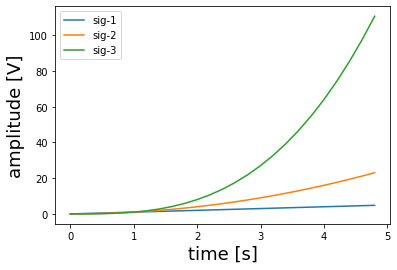

In [30]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, label="sig-1")
plt.plot(t, t**2, label="sig-2")
plt.plot(t, t**3, label="sig-3")

plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend()

#### What is the problem ?
There is no markers

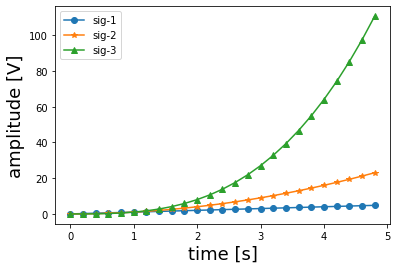

In [33]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, label="sig-1", marker="o")
plt.plot(t, t**2, label="sig-2", marker="*")
plt.plot(t, t**3, label="sig-3", marker="^")

plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend()

# Non-linear scale

In [11]:
mu, sigma = 3., 1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100000)

(0, 600)

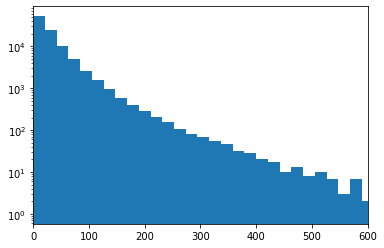

In [36]:
_ = plt.hist(s, bins=100)
plt.yscale('log')
plt.xlim([0, 600])

#### What is the problem?
we cannot see scale

In [13]:
# ...

# Seaborn !

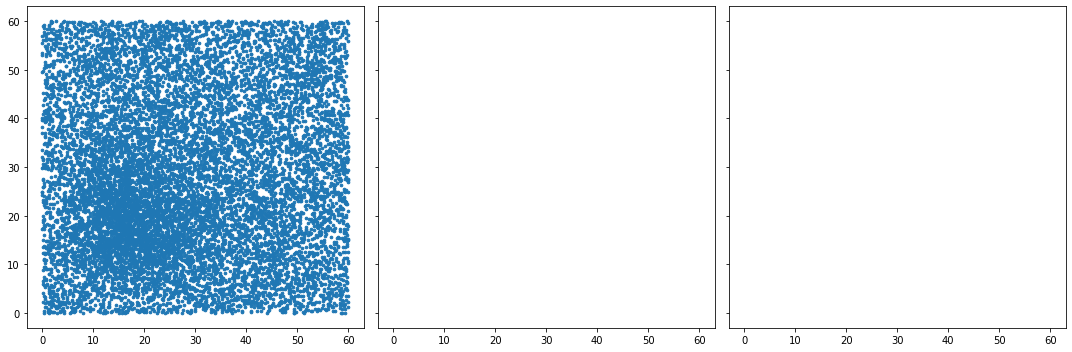

In [37]:
mu, sigma = 3., 0.5 # mean and standard deviation
x = np.random.lognormal(mu, sigma, 3000)
y = np.random.lognormal(mu, sigma, 3000)
x[x>60] = np.mean(x)
y[y>60] = np.mean(y)
x = np.append(x,np.random.uniform(0,60,10000))
y = np.append(y,np.random.uniform(0,60,10000))

f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].scatter(x, y, s=7)

f.tight_layout()

#### What is the problem ?

/Users/lamborellemaxime/anaconda3/envs/ada/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'a_level'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


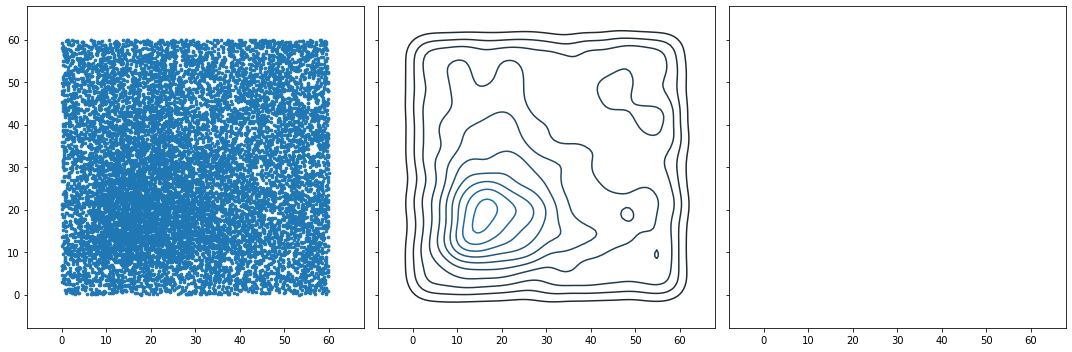

In [39]:
mu, sigma = 3., 0.5 # mean and standard deviation
x = np.random.lognormal(mu, sigma, 3000)
y = np.random.lognormal(mu, sigma, 3000)
x[x>60] = np.mean(x)
y[y>60] = np.mean(y)
x = np.append(x,np.random.uniform(0,60,10000))
y = np.append(y,np.random.uniform(0,60,10000))

f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].scatter(x, y, s=7)

sns.kdeplot(x,y, a_level=10, ax=axes[1])

f.tight_layout()

# Resources

* [Matplotlib gallery](https://matplotlib.org/gallery.html)
* [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [D3 gallery](https://github.com/d3/d3/wiki/Gallery)